In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tools.clusterfit as cf
import seaborn as sns
plt.style.use('nice.mplstyle')

In [2]:
data = pd.read_csv('../data/samples_in_lightcone0_with_trees_duplicate_excision_outlier_excision.csv')
# data = pd.read_csv('../data/samples_in_lightcone0.csv')
frac = pd.read_csv('../data/jay_id_core_fraction(1).csv')
obs  = pd.read_csv('../data/obs-concentration.csv')

In [3]:
len(data), len(frac)

(706, 771)

In [4]:
# frac['snap_num'] = frac['snap_num'].astype(int)
# frac['SOAPID'] = frac['SOAPID'].astype(int)
# data = data.merge(frac, on=['SOAPID', 'snap_num']) # this should match both SOAPID and snap_num. 
# # but it doesnt for now. Wait for Joey. If it's only a misalignment then it's fine.
# len(data), len(frac)

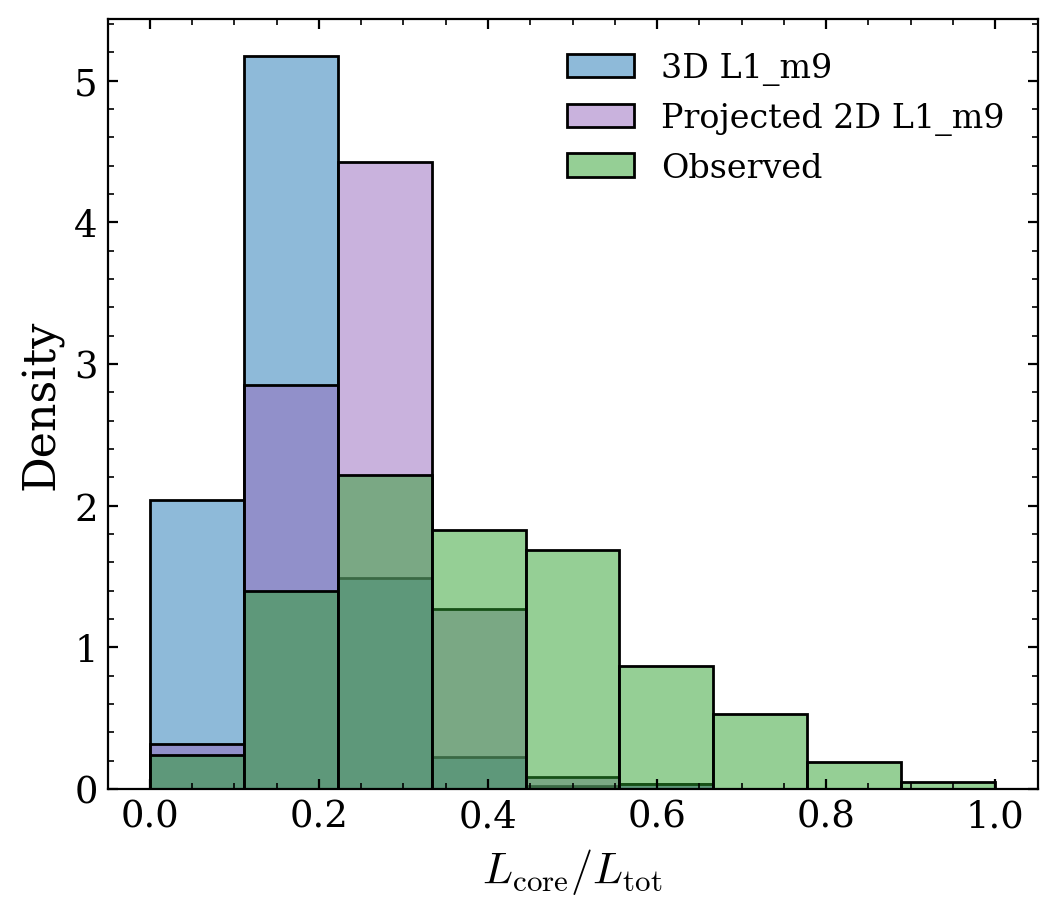

In [8]:
fig, ax = plt.subplots(1,1,figsize=(6,5), dpi=200)
bins = np.linspace(0, 1, 10)
sns.histplot(data['3DLcore/Ltot'], bins=bins, stat='density', alpha=0.5, label='3D L1_m9')
sns.histplot(data['2DLcore/Ltot'], bins=bins, stat='density', alpha=0.5, label='Projected 2D L1_m9',color='tab:purple')
sns.histplot(obs['Fraction'], bins=bins, stat='density', alpha=0.5, label='Observed', color='tab:green')
plt.xlabel('$L_\\mathrm{{core}}/L_\\mathrm{{tot}}$')
plt.legend()
plt.savefig(f'/Users/yujiehe/Documents/projects/project-anisotropy/plots/forpaper/sample-LcoreLtot.pdf', bbox_inches='tight')
plt.show()

In [6]:
import scipy
scipy.stats.ttest_ind(data['3DLcore/Ltot'], obs['Fraction'])

TtestResult(statistic=-25.043035341090604, pvalue=3.254814693058334e-105, df=891.0)